In [14]:
import pickle
import os
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
from scipy import signal
from scipy.stats import skew,kurtosis,iqr

In [15]:
filelists = ['../../affect-recognition/data/4/'+a for a in os.listdir('../../affect-recognition/data/4/') if a[-1] not in ['s','f']]

In [16]:
filelists[0]

'../../affect-recognition/data/4/S11.pkl'

In [22]:
from sklearn.preprocessing import RobustScaler
X_acc = []
X_ppg = []
X_qual = []
X_respiration = []
y_rr = []
y_inspiration = []
y_expiration = []
y_respiration = []
groups = []
for i in range(len(filelists)):
    data = pickle.load(open(filelists[i],'rb'))
#     print(data['acc_window'].loc[0].shape)
    
    data['acc_window'] = data['acc_window'].apply(lambda a:a[:,1:] if a.shape[0]==128 else np.concatenate([a[:,1:],np.mean(a[:,1:],axis=0).reshape(-1,3)],axis=0))
    data['data'] = data['data'].apply(lambda a:a.values[:,1:])
    data['shape'] = data['acc_window'].apply(lambda a:a.shape)
    
#     print(data['shape'].unique())
    acc_windows = np.array(list(data['acc_window']))
    ppg_windows = np.array(list(data['data']))
    respiration_windows = np.array(list(data['respiration']))
    ppg_data = ppg_windows[:,:,:1].reshape(-1,256)
    ppg_qual_data = ppg_windows[:,:,1:]
    ecg_rr = np.array(list(data['ecg_rr'])).reshape(-1,1)
    inspiration = np.array(list(data['inspiration_duration'])).reshape(-1,1)
    expiration = np.array(list(data['expiration_duration'])).reshape(-1,1)
    respiration = np.array(list(data['respiration_duration'])).reshape(-1,1)
    X_ppg.append(ppg_data)
    X_acc.append(acc_windows)
    X_qual.append(ppg_qual_data)
    X_respiration.append(respiration_windows)
    y_rr.append(ecg_rr)
    y_inspiration.append(inspiration)
    y_expiration.append(expiration)
    y_respiration.append(respiration)
    groups += [i]*ecg_rr.shape[0]
    print(acc_windows.shape,ppg_data.shape,ppg_qual_data.shape,ecg_rr.shape,len(groups),respiration_windows.shape)

(5227, 128, 3) (5227, 256) (5227, 256, 4) (5227, 1) 5227 (5227, 2790, 1)
(6417, 128, 3) (6417, 256) (6417, 256, 4) (6417, 1) 11644 (6417, 2790, 1)
(5246, 128, 3) (5246, 256) (5246, 256, 4) (5246, 1) 16890 (5246, 2790, 1)
(6487, 128, 3) (6487, 256) (6487, 256, 4) (6487, 1) 23377 (6487, 2790, 1)
(5232, 128, 3) (5232, 256) (5232, 256, 4) (5232, 1) 28609 (5232, 2790, 1)
(7065, 128, 3) (7065, 256) (7065, 256, 4) (7065, 1) 35674 (7065, 2790, 1)
(5914, 128, 3) (5914, 256) (5914, 256, 4) (5914, 1) 41588 (5914, 2790, 1)
(5531, 128, 3) (5531, 256) (5531, 256, 4) (5531, 1) 47119 (5531, 2790, 1)
(5490, 128, 3) (5490, 256) (5490, 256, 4) (5490, 1) 52609 (5490, 2790, 1)
(6252, 128, 3) (6252, 256) (6252, 256, 4) (6252, 1) 58861 (6252, 2790, 1)
(5625, 128, 3) (5625, 256) (5625, 256, 4) (5625, 1) 64486 (5625, 2790, 1)
(5217, 128, 3) (5217, 256) (5217, 256, 4) (5217, 1) 69703 (5217, 2790, 1)
(5460, 128, 3) (5460, 256) (5460, 256, 4) (5460, 1) 75163 (5460, 2790, 1)
(6073, 128, 3) (6073, 256) (6073, 256, 

In [23]:
X_ppg,X_qual,X_respiration,X_acc,y_rr, y_respiration,y_inspiration,y_expiration = np.concatenate(X_ppg),np.concatenate(X_qual), \
                                        np.concatenate(X_respiration),np.concatenate(X_acc),np.concatenate(y_rr), \
                                        np.concatenate(y_respiration),np.concatenate(y_inspiration), \
                                        np.concatenate(y_expiration)
groups = np.array(groups)

In [24]:
pickle.dump([X_ppg,X_qual,X_acc,y_rr, y_respiration,y_inspiration,y_expiration,groups,X_respiration],open('../../affect-recognition/data/tabular_data_4.p','wb'))

(array([ 1779.,  9795., 15189.,  9299.,  3939.,  1382.,  1061.,   686.,
          201.,    32.]),
 array([ 43.36155248,  54.99787083,  66.63418918,  78.27050752,
         89.90682587, 101.54314422, 113.17946256, 124.81578091,
        136.45209926, 148.08841761, 159.72473595]),
 <a list of 10 Patch objects>)

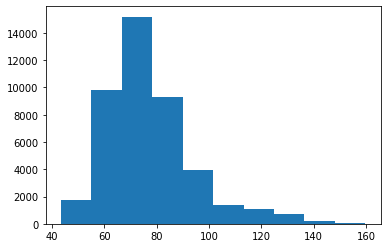

In [13]:
plt.hist(60000/(1000*y_rr))

In [56]:
y_rr

array([[0.63978023],
       [0.64678572],
       [0.66607141],
       ...,
       [0.68619049],
       [0.75185714],
       [0.64362638]])